In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# Data Exploration

In [4]:
cars_data = pd.read_csv("./Dataset/autos.csv", encoding = 'cp850')
cars_data = cars_data.drop(['nrOfPictures'], axis = 1)

In [5]:
cars = cars_data.copy() # deep copy

In [6]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T▄RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
postalCode             371528 non-null int64
lastSeen               371528 non-null object
dtypes: int64(6), obj

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # used to get rid of scientific notation
# use the following if all columns are not displayed. 500 is the columns to display
# pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,371528.000,371528.000,371528.000,371528.000,371528.000,371528.000
mean,17295.142,2004.578,115.549,125618.688,5.734,50820.668
std,3587953.744,92.867,192.140,40112.337,3.712,25799.082
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,70.000,125000.000,3.000,30459.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49610.000
75%,7200.000,2008.000,150.000,150000.000,9.000,71546.000
max,2147483647.000,9999.000,20000.000,150000.000,12.000,99998.000


infrences from above data
- the mean of price is 17000 whereas 2nd quartine is about 3000 which is a huge gap, so the distrubution os price is skewed.
- The year of registration is just year, but minimum and maximum values as 1000 and 9999respectively but they do not make sense.
- The powerPA has mean of 115 and 2nd quartile is about 105 which are pretty close to each other
- The average Kilometer drived by a vehicle ia 1,25,000kms which is about the value of first quartile.
- min month of registration doesnot make any sence.
- also the postal is a categorical variable not continous variable

In [10]:
# dropping unwanted data
unwanted = ['name', 'dateCrawled', 'dateCreated','postalCode', 'lastSeen']
cars = cars.drop(unwanted, axis = 1)
cars.shape

(371528, 14)

In [11]:
# removind suplicate entries
cars.drop_duplicates(keep = 'first', inplace = True)
cars.shape
# we got about 20000 duplicate entries which are dropped

(353306, 14)

In [12]:
# Exploring  categorical variables
cars.describe(include = 'O')

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,353306,353306,353306,316867,334744,333598,321084,353306,284342
unique,2,2,2,8,2,251,7,40,2
top,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein
freq,353303,353294,182841,90589,261430,28236,213704,74987,249066


In [13]:
for i in cars.describe(include = 'O').columns:
    print(cars[i].value_counts())
    print()

privat        353303
gewerblich         3
Name: seller, dtype: int64

Angebot    353294
Gesuch         12
Name: offerType, dtype: int64

test       182841
control    170465
Name: abtest, dtype: int64

limousine     90589
kleinwagen    76096
kombi         63930
bus           28881
cabrio        21910
coupe         18278
suv           13898
andere         3285
Name: vehicleType, dtype: int64

manuell      261430
automatik     73314
Name: gearbox, dtype: int64

golf               28236
andere             25618
3er                19440
polo               12384
corsa              11876
                   ...  
kalina                 8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

benzin     213704
diesel     101096
lpg          5153
cng           549
hybrid        273
andere        206
elektro       103
Name: fuelType, dtype: int64

volkswagen        74987
opel              38146
bmw               

In [14]:
correlation = cars.corr()
correlation
# none of them are correlated to each other as no value is close to -1 or +1

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000,-0.000,0.007,-0.001,-0.003
yearOfRegistration,-0.000,1.000,0.000,-0.055,-0.012
powerPS,0.007,0.000,1.000,-0.010,0.043
kilometer,-0.001,-0.055,-0.010,1.000,0.002
monthOfRegistration,-0.003,-0.012,0.043,0.002,1.000


# Data Cleaning

In [15]:
cars.isna().sum()

seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            36439
yearOfRegistration         0
gearbox                18562
powerPS                    0
model                  19708
kilometer                  0
monthOfRegistration        0
fuelType               32222
brand                      0
notRepairedDamage      68964
dtype: int64

In [16]:
yearwise_count = cars.yearOfRegistration.value_counts().sort_index()
print(yearwise_count)

1000    38
1001     1
1039     1
1111     4
1200     1
        ..
9000     5
9229     1
9450     1
9996     1
9999    26
Name: yearOfRegistration, Length: 155, dtype: int64


In [17]:
print(sum(cars['yearOfRegistration'] > 2020))

111


In [18]:
print(sum(cars['yearOfRegistration'] < 1950))

274


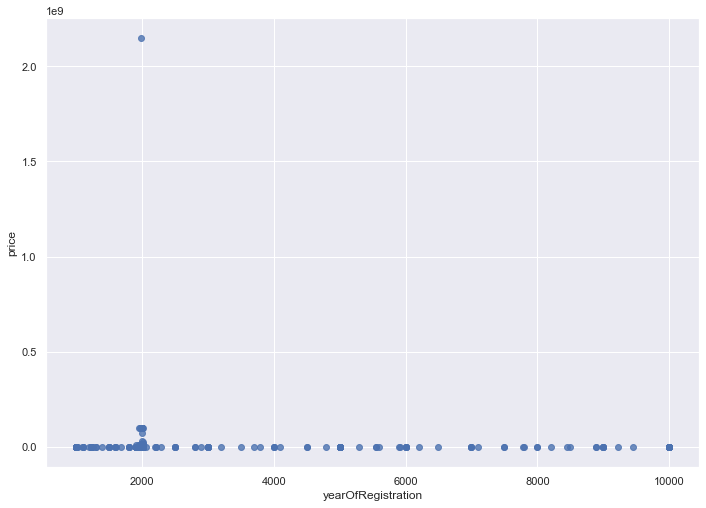

In [19]:
sns.regplot(x = 'yearOfRegistration', y = 'price', scatter = True, fit_reg = False, data = cars)

# plots not explaining anything 
# need cleaning
# The working range is set to be 1950 to 2020

In [20]:
price_count = cars.price.value_counts().sort_index()
price_count
# price value and frequency


0             9811
1             1127
2               12
3                8
4                1
              ... 
32545461         1
74185296         1
99000000         1
99999999        15
2147483647       1
Name: price, Length: 5597, dtype: int64

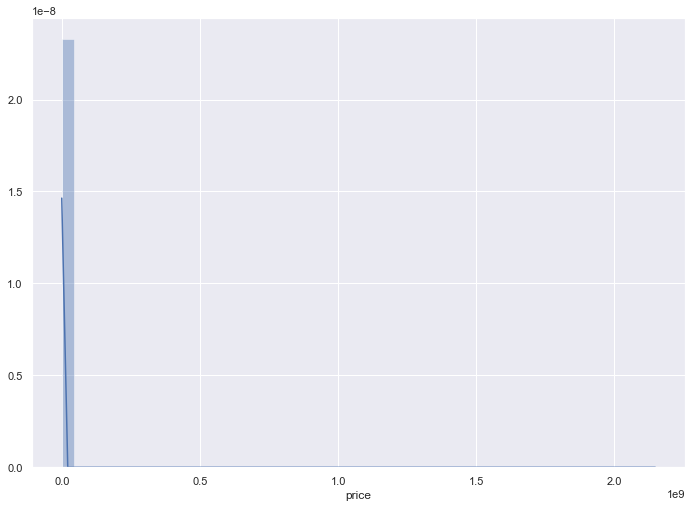

In [21]:
sns.distplot(cars['price'])
# this is due to a lot of values in 0 price

In [22]:
cars.price.describe()
# there is a huge difference between mean and 2nd quartile which means skewness

count       353306.000
mean         17901.107
std        3679314.435
min              0.000
25%           1111.000
50%           2950.000
75%           7200.000
max     2147483647.000
Name: price, dtype: float64

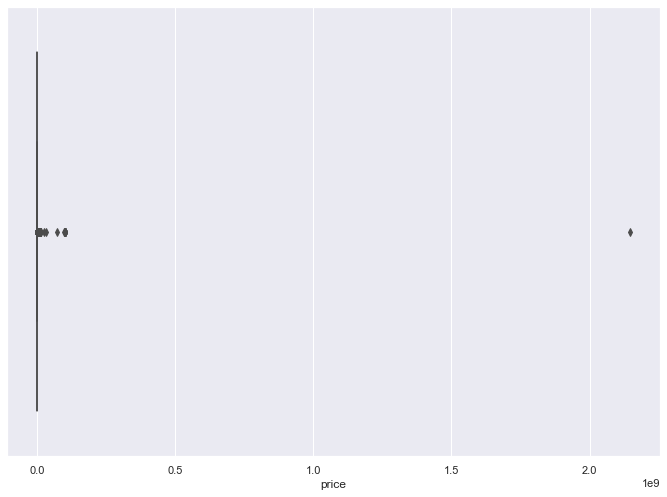

In [23]:
sns.boxplot(x = cars.price)

In [24]:
# price range is set to be 100 to 150000
sum(cars.price > 150000)

230

In [25]:
sum(cars.price < 100)

12269

In [26]:
powerPS_count = cars.powerPS.value_counts().sort_index()
powerPS_count

0        38637
1           32
2           10
3            9
4           27
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: powerPS, Length: 794, dtype: int64

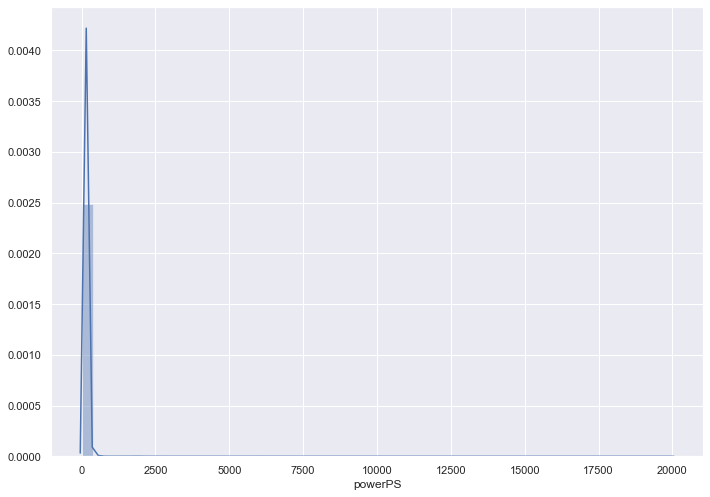

In [27]:
sns.distplot(cars.powerPS)

In [28]:
cars.powerPS.describe()
# mean and 2nd quartile are not quite apart but standard deviation is quite large

count   353306.000
mean       115.759
std        196.373
min          0.000
25%         70.000
50%        105.000
75%        150.000
max      20000.000
Name: powerPS, dtype: float64

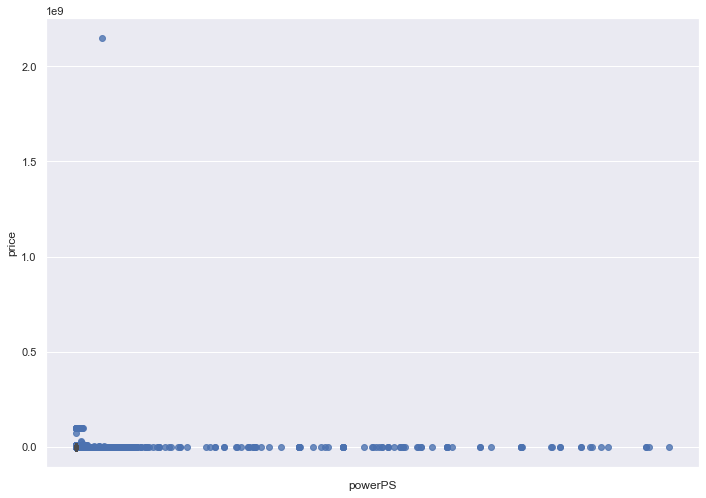

In [29]:
sns.boxplot(y = cars.powerPS)
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars)

In [30]:
# setting working range of powerPS to be 10 and 500
sum(cars.powerPS > 500)

825

In [31]:
sum(cars.powerPS < 10)

38847

In [32]:
# The data all shown above are skewed ie have a lot of outliers and we have to clean them up.

In [33]:
# Extracting the working data from whole data
cars = cars[
    (cars.yearOfRegistration <=2020)
    &(cars.yearOfRegistration >= 1950)
    &(cars.price >= 100)
    &(cars.price <= 150000)
    &(cars.powerPS >= 10)
    &(cars.powerPS <= 500)
]
cars.shape

(305771, 14)

In [34]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,305771.000,305771.000,305771.000,305771.000,305771.000
mean,6138.760,2003.609,125.460,125651.108,5.968
std,7950.499,7.162,59.871,39173.252,3.589
min,100.000,1950.000,10.000,5000.000,0.000
25%,1400.000,1999.000,80.000,100000.000,3.000
50%,3450.000,2004.000,116.000,150000.000,6.000
75%,7900.000,2008.000,150.000,150000.000,9.000
max,150000.000,2019.000,500.000,150000.000,12.000


In [35]:
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja


It is hard to get the age of the car. so we'll do 2020-yearOfRegistration and add monthOfRegistration/12 to it and this vatiable is going to be stored in age column.

In [36]:
cars['monthOfRegistration'] /= 12
cars.monthOfRegistration.head()

1   0.417
2   0.667
3   0.500
4   0.583
5   0.833
Name: monthOfRegistration, dtype: float64

In [37]:
cars['age'] = (2020-cars.yearOfRegistration)+cars.monthOfRegistration
cars.age - round(cars.age, 2)
cars.age.describe()

# As the result shows the mean and median (2nd quartile) are quite close.

count   305771.000
mean        16.888
std          7.160
min          1.000
25%         12.250
50%         16.833
75%         21.250
max         70.583
Name: age, dtype: float64

In [38]:
cars = cars.drop(columns = ['yearOfRegistration', 'monthOfRegistration'], axis = 1)

# Visualizing parameters

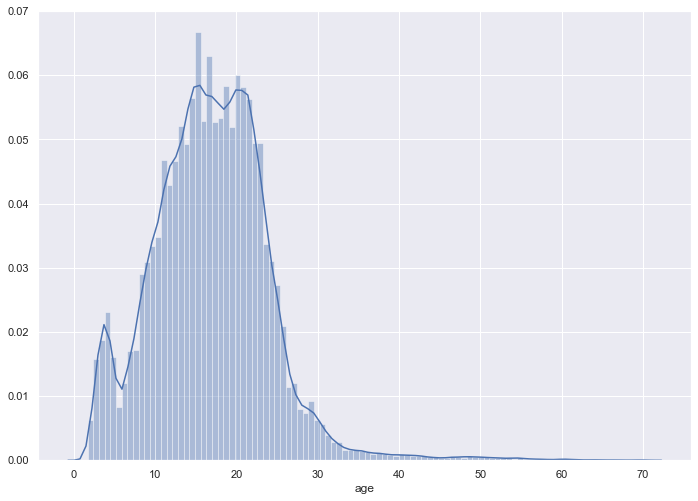

In [39]:
sns.distplot(cars.age, bins = 100)

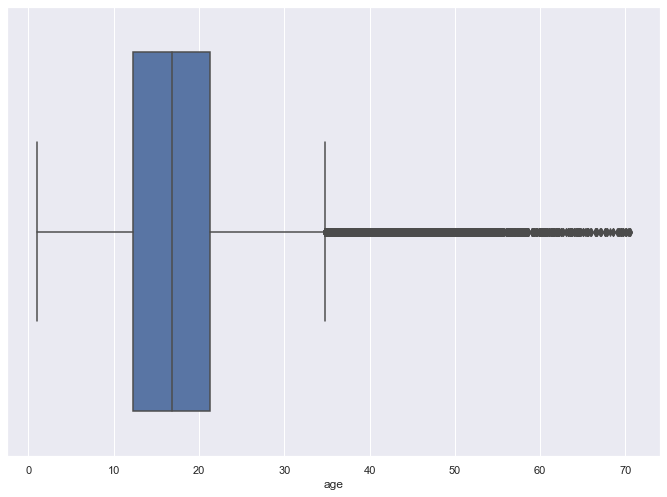

In [40]:
sns.boxplot(x = cars.age)

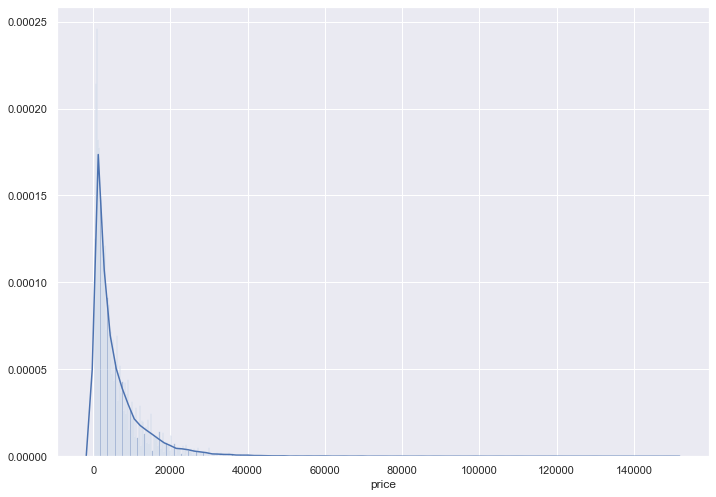

In [41]:
sns.distplot(cars.price, bins = 500)

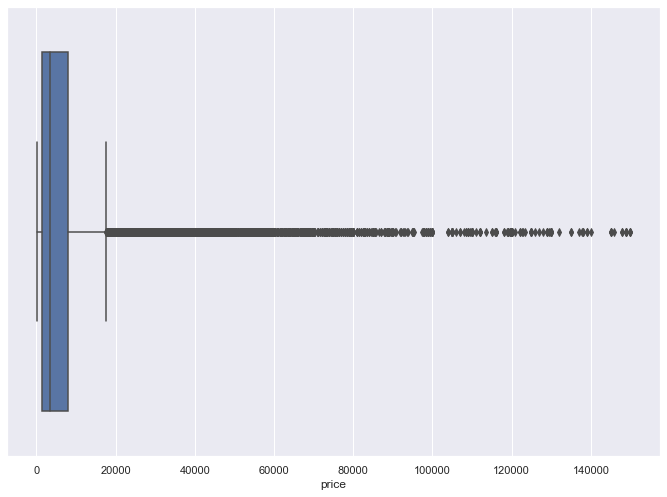

In [42]:
sns.boxplot(x = cars.price)

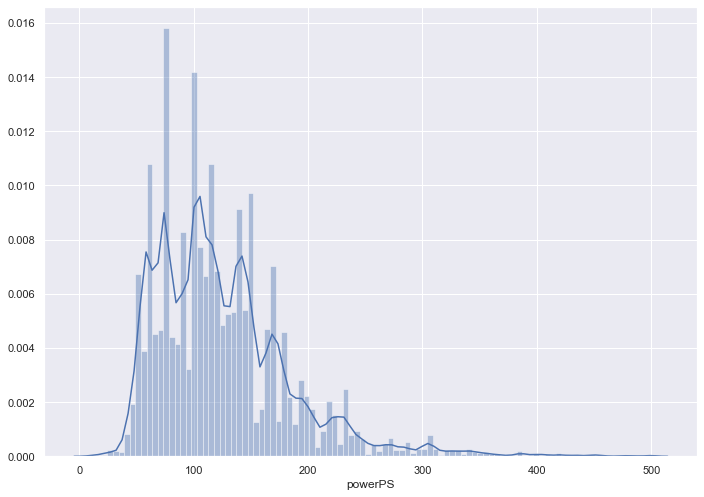

In [43]:
sns.distplot(cars.powerPS, bins = 100)

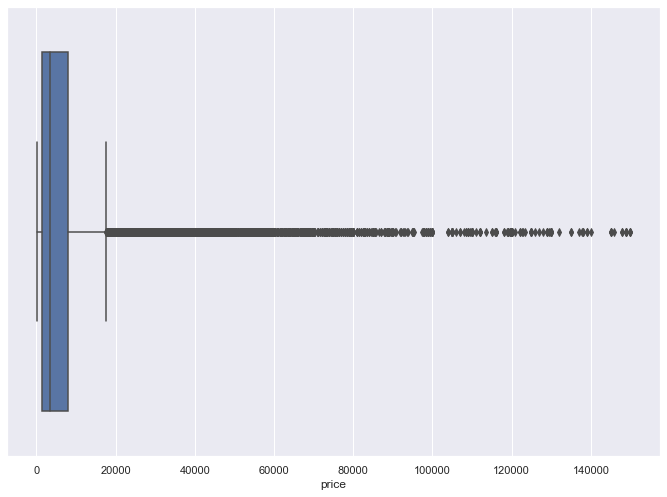

In [44]:
sns.boxplot(x = cars.price)

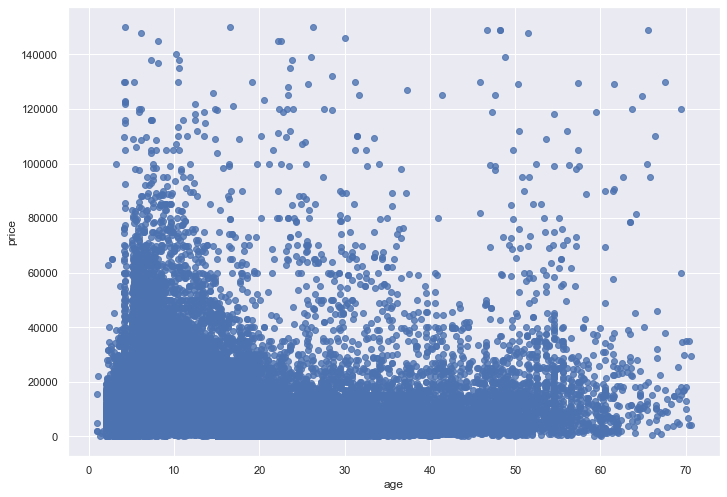

In [45]:
# age vs price
sns.regplot(x = 'age', y= "price", scatter = True, fit_reg = False, data = cars)

- cars priced higher are newer
- with increase in age price decreases
- however sone cars are priced higher with increase in age they are vintage cars

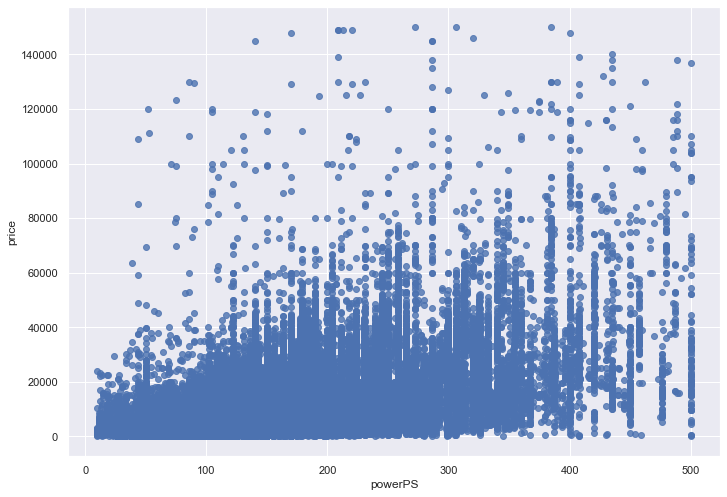

In [46]:
# powerPS vs price
sns.regplot(x = 'powerPS', y= "price", scatter = True, fit_reg = False, data = cars)

- With increase in powerps the price increases

In [47]:
cars.seller.value_counts() # these are commercial and private and since private is only two we can drop this column

privat        305769
gewerblich         2
Name: seller, dtype: int64

In [48]:
cars.offerType.value_counts() # this is also insignificant

Angebot    305769
Gesuch          2
Name: offerType, dtype: int64

In [49]:
cars.abtest.value_counts()

test       158189
control    147582
Name: abtest, dtype: int64

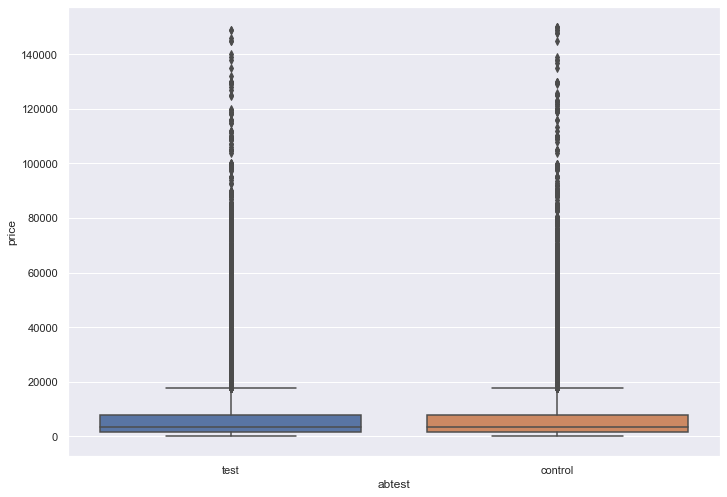

In [50]:
sns.boxplot(x = 'abtest', y = 'price', data = cars) 
# The distribution is similar(50-50) for both so does not affect price, can be dropped

In [51]:
cars.vehicleType.value_counts()

limousine     82443
kleinwagen    66226
kombi         58144
bus           26310
cabrio        20298
coupe         16401
suv           12777
andere         2427
Name: vehicleType, dtype: int64

In [52]:
pd.crosstab(cars.vehicleType, columns = "count", normalize = True)

col_0,count
vehicleType,
andere,0.009
bus,0.092
cabrio,0.071
coupe,0.058
kleinwagen,0.232
kombi,0.204
limousine,0.289
suv,0.045


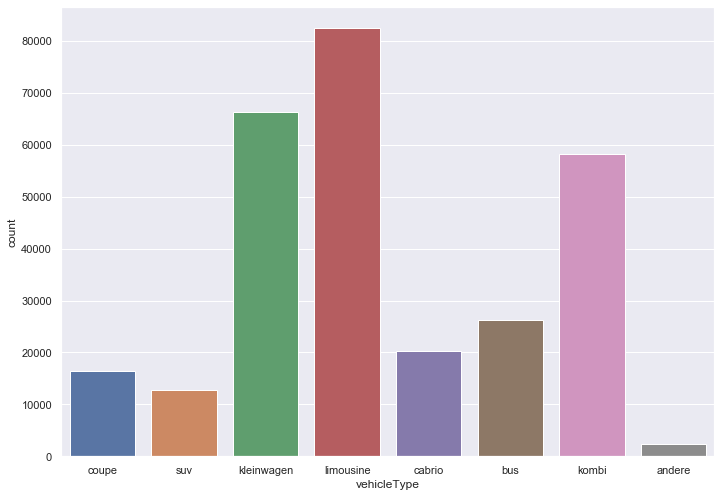

In [53]:
sns.countplot(x = 'vehicleType', data = cars)

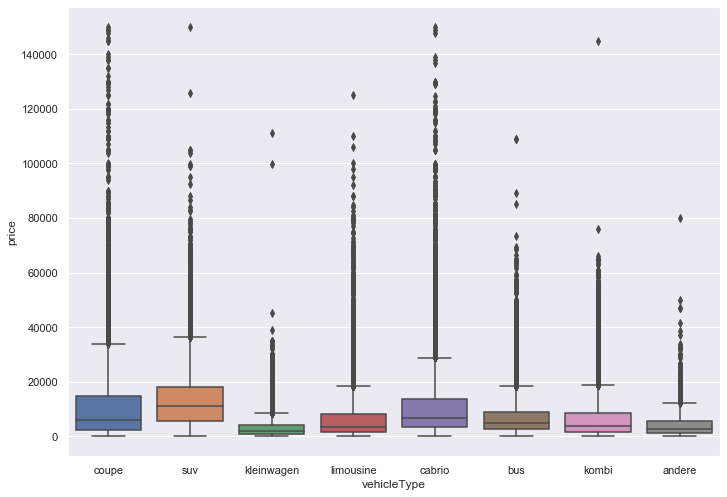

In [54]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)

In [55]:
cars.gearbox.value_counts()

manuell      233207
automatik     66665
Name: gearbox, dtype: int64

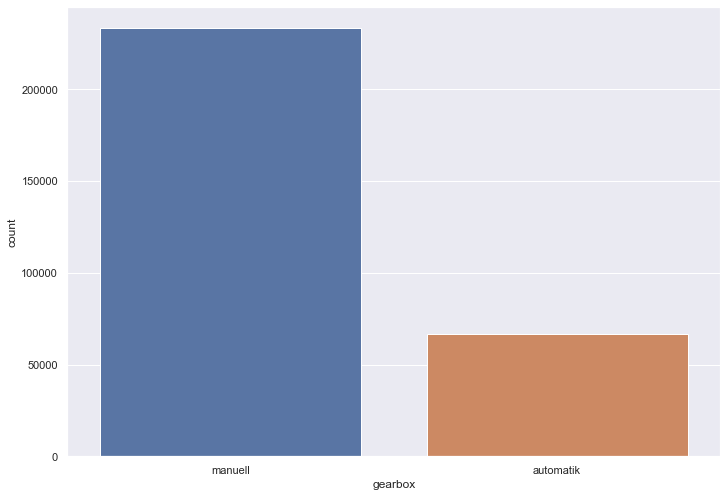

In [56]:
sns.countplot(x = 'gearbox', data = cars)

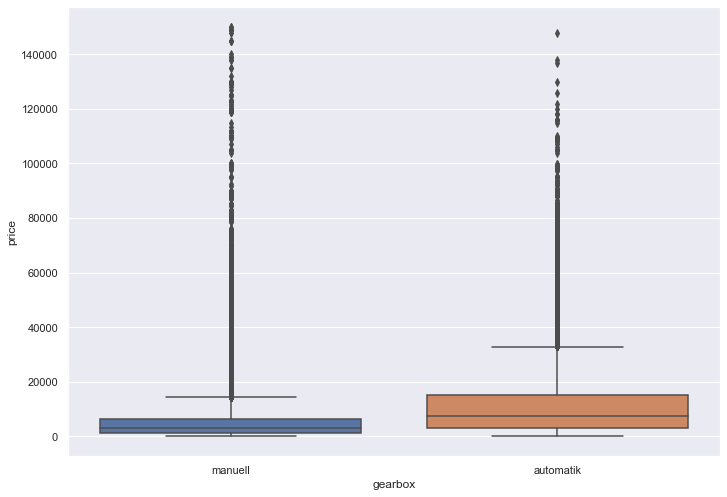

In [57]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)

In [58]:
cars.model.value_counts()

golf               25240
andere             21686
3er                17532
polo               10487
corsa               9845
                   ...  
samara                 5
rangerover             5
kalina                 4
serie_3                3
discovery_sport        1
Name: model, Length: 250, dtype: int64

In [59]:
cars.kilometer.value_counts().sort_index()

5000        3390
10000       1551
20000       4741
30000       5214
40000       5624
50000       6759
60000       7609
70000       8710
80000       9699
90000      10883
100000     13391
125000     32675
150000    195525
Name: kilometer, dtype: int64

In [60]:
pd.crosstab(cars.kilometer, columns = 'count', normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.016
30000,0.017
40000,0.018
50000,0.022
60000,0.025
70000,0.028
80000,0.032


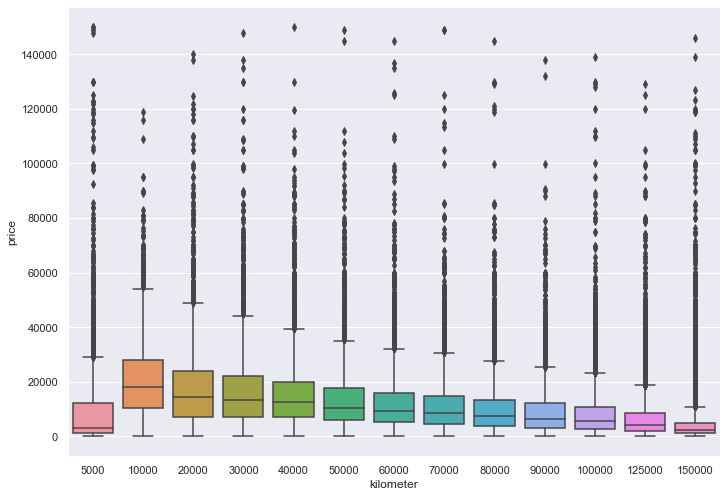

In [61]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars)

In [62]:
cars.kilometer.describe()

count   305771.000
mean    125651.108
std      39173.252
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

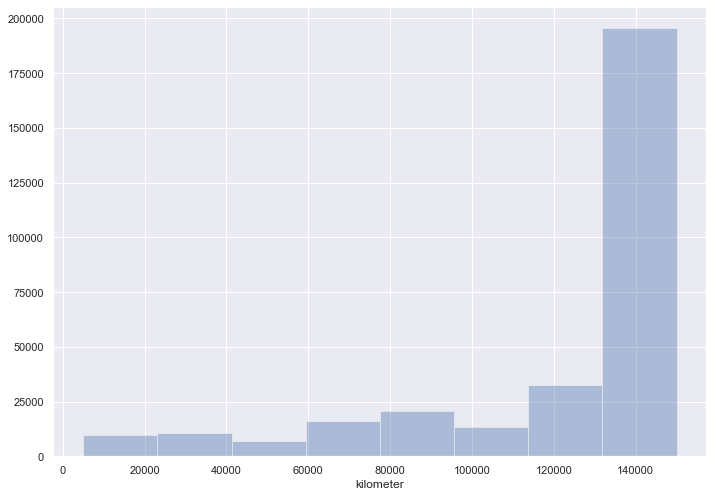

In [63]:
sns.distplot(cars.kilometer, bins = 8, kde = False)

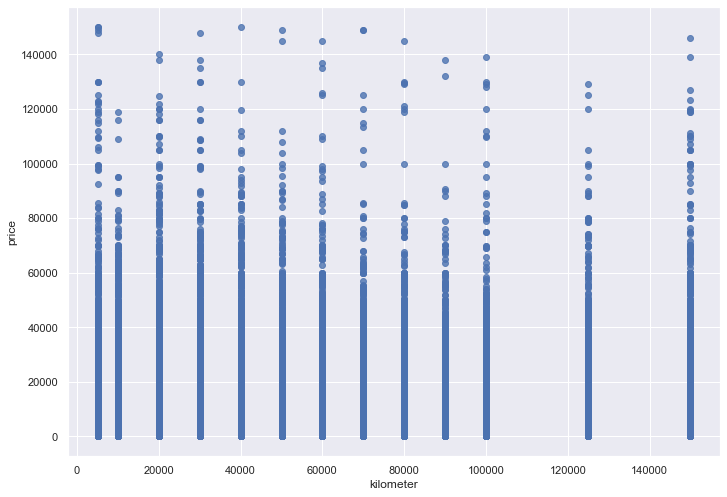

In [64]:
sns.regplot(x = 'kilometer', y = 'price', scatter = True, fit_reg = False, data = cars)

In [65]:
cars.fuelType.value_counts()

benzin     188398
diesel      92485
lpg          4631
cng           481
hybrid        242
andere         87
elektro        70
Name: fuelType, dtype: int64

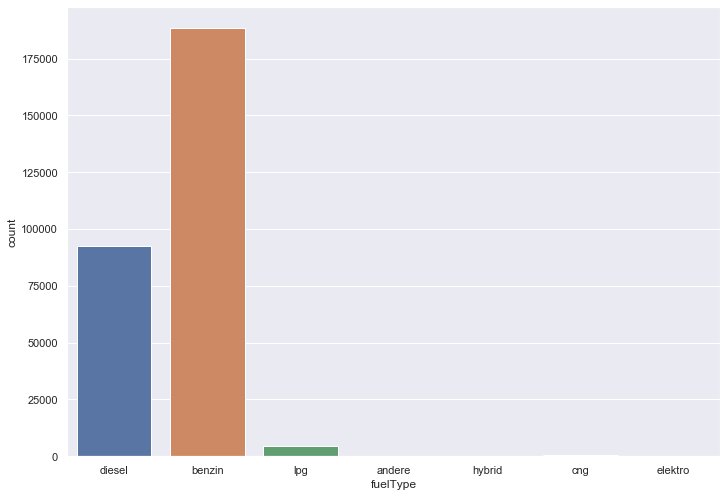

In [66]:
sns.countplot(x = 'fuelType', data = cars)

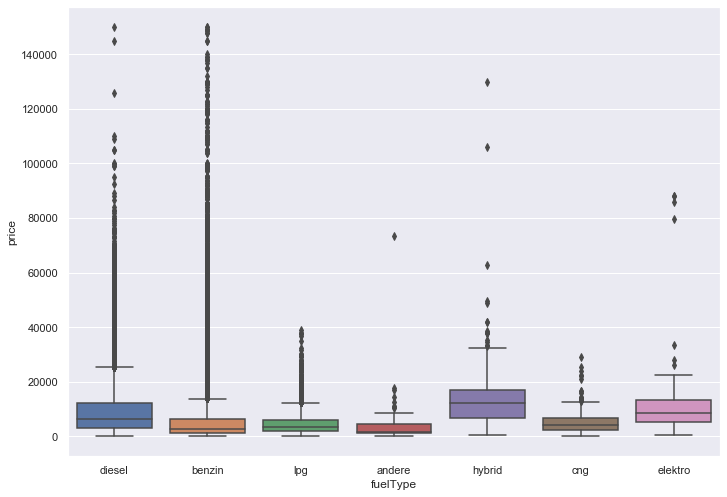

In [67]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars)

In [68]:
cars.brand.value_counts()

volkswagen        65416
bmw               34244
opel              32138
mercedes_benz     29509
audi              28085
ford              20642
renault           13895
peugeot            9191
fiat               7607
seat               5944
skoda              4926
mazda              4755
smart              4435
citroen            4264
nissan             4072
toyota             4052
hyundai            3113
mini               3066
volvo              2821
mitsubishi         2519
honda              2393
kia                2138
sonstige_autos     2120
alfa_romeo         1985
suzuki             1937
porsche            1851
chevrolet          1507
chrysler           1159
dacia               785
jeep                689
land_rover          663
subaru              657
daihatsu            604
jaguar              513
saab                462
daewoo              407
lancia              395
rover               372
trabant             286
lada                154
Name: brand, dtype: int64

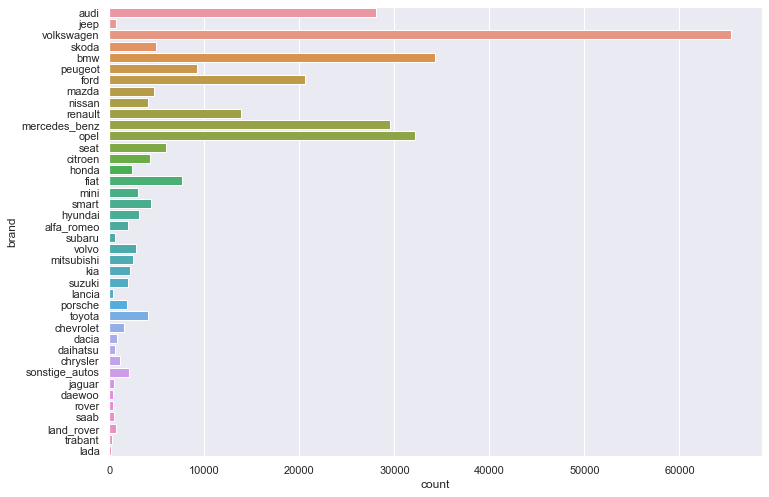

In [69]:
sns.countplot(y = 'brand', data = cars)

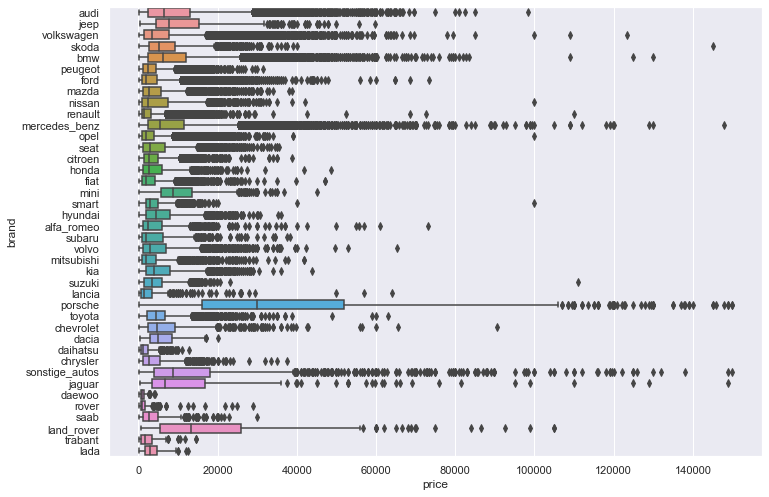

In [70]:
sns.boxplot(y = 'brand', x = 'price', data = cars)

In [71]:
cars.notRepairedDamage.value_counts()

nein    231513
ja       28623
Name: notRepairedDamage, dtype: int64

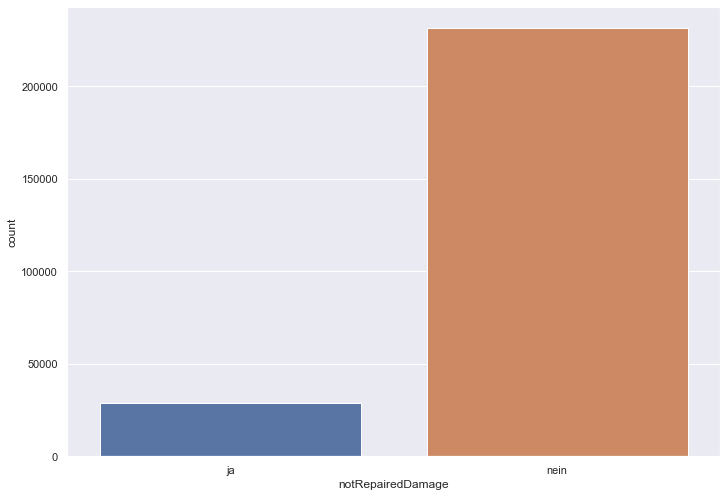

In [72]:
sns.countplot(x = 'notRepairedDamage', data = cars)

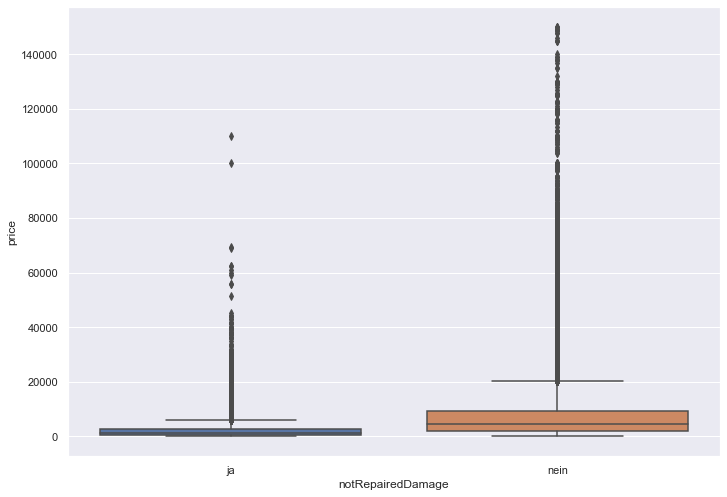

In [73]:
sns.boxplot(x = 'notRepairedDamage', y = "price", data = cars)

In [74]:
col = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns = col, axis = 1)
cars_copy = cars.copy()
cars_copy.shape

(305771, 10)

# Correlations

In [75]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation, 3)

,price,powerPS,kilometer,age
price,1.000,0.572,-0.442,-0.336
powerPS,0.572,1.000,-0.016,-0.154
kilometer,-0.442,-0.016,1.000,0.295
age,-0.336,-0.154,0.295,1.000


In [76]:
cars_select1.corr().loc[:, 'price'].abs().sort_values(ascending = False)[1:]

powerPS     0.572
kilometer   0.442
age         0.336
Name: price, dtype: float64